In [9]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Paytm-Epurchase-data.csv')

In [5]:
data.columns

Index(['S.no', 'Name', 'Shipping_city', 'Category_Grouped', 'Category',
       'Sub_category', 'Product_Gender', 'Segment', 'Class', 'Family', 'Brand',
       'Brick', 'Item_NM', 'Color', 'Size', 'Sale_Flag', 'Payment_Method',
       'coupon_money_effective', 'Coupon_Percentage', 'Quantity', 'Cost_Price',
       'Item_Price', 'Special_Price_effective', 'paid_pr_effective',
       'Value_CM1', 'Value_CM2', 'Special_price', 'Paid_pr'],
      dtype='object')

In [31]:
# 7. Total Sales Value for Each Category
total_sales_by_category = data.groupby('Category_Grouped')['Item_Price'].sum()
total_sales_by_category

Category_Grouped
Apparels    56208837
Home         3051213
Others      83734877
Shoes       68406549
Name: Item_Price, dtype: int64

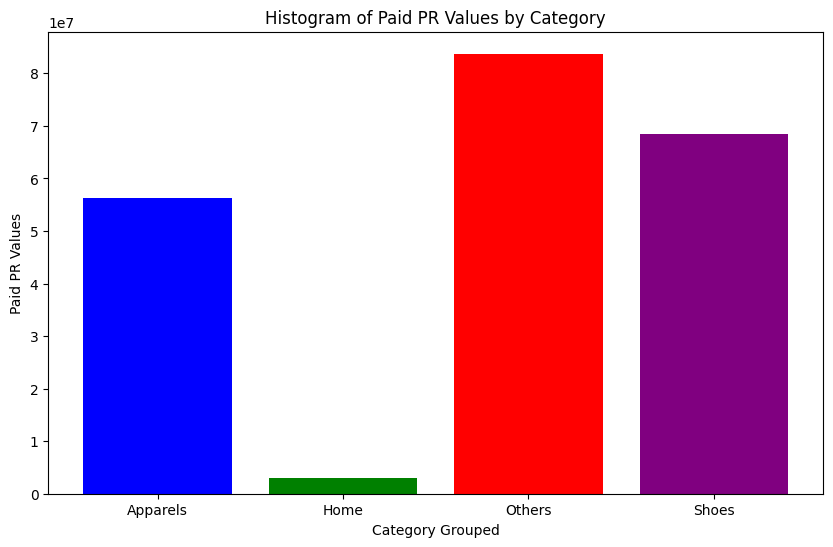

In [32]:
# 8. Bar Chart for Total Sales by Category (visualization, not executable here)
categories = ['Apparels', 'Home', 'Others', 'Shoes']
paid_pr_values = [56208837, 3051213, 83734877, 68406549]

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(categories, paid_pr_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Category Grouped')
plt.ylabel('Paid PR Values')
plt.title('Histogram of Paid PR Values by Category')
plt.show()


In [24]:
# 9. Average Quantity Sold by Product Gender in Clothing Category
avg_quantity_clothing = data[data['Category_Grouped'] == 'Clothing'].groupby('Product_Gender')['Quantity'].mean()
avg_quantity_clothing

Series([], Name: Quantity, dtype: float64)

In [25]:
# 10. Top 5 Products by 'Value_CM1' and 'Value_CM2' Ratios
data['cm_ratio'] = data['Value_CM1'] / data['Value_CM2']
top_products = data.nlargest(5, 'cm_ratio')
top_products

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Class,Family,...,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr,cm_ratio
46,47,rohit gupta,Jaipur,Others,WATCHES,WATCHES,MEN,MENS ACCESSORIES,WATCHES,NaN,...,1,3503.31,5999,4499.0,4499.0,473.71,91.71,4499,4499,5.165304
52,53,HARANESWARAN tH,Chennai,NaN,Men Footwear,MENS FOOTWEAR,MEN,MENS FOOTWEAR,NaN,SPORTS,...,1,3503.31,5999,4499.0,4499.0,473.71,91.71,4499,4499,5.165304
279,280,Neeraj Pandey,Gurgaon,NaN,Men Footwear,MENS FOOTWEAR,MEN,MENS FOOTWEAR,NaN,SPORTS,...,1,3503.31,5999,4499.0,4499.0,473.71,91.71,4499,4499,5.165304
327,328,mayank bajaj,Gwalior,NaN,Men Footwear,MENS FOOTWEAR,MEN,MENS FOOTWEAR,NaN,SPORTS,...,1,3503.31,5999,4499.0,4499.0,473.71,91.71,4499,4499,5.165304
392,393,sakkiah vinayag,Chennai,Others,WATCHES,WATCHES,MEN,MENS ACCESSORIES,WATCHES,NaN,...,1,3503.31,5999,4499.0,4499.0,473.71,91.71,4499,4499,5.165304


In [33]:
# 11. Top 3 Classes by Total Sales and Visualization
top_classes = data.groupby('Class')['Item_Price'].sum().nlargest(3)
top_classes

Class
WATCHES    62213793
SETS       25529167
AVIATOR    15863415
Name: Item_Price, dtype: int64

In [34]:
# 12. Top 3 Brands by Sales
top_brands = data.groupby('Brand')['Item_Price'].sum().nlargest(3)
top_brands

Brand
NIKE       43406505
SANGRIA    22614700
PUMA       20832027
Name: Item_Price, dtype: int64

In [36]:
# 13. Total Revenue from 'Electronics' with 'Sale_Flag' 'Yes'
total_revenue_electronics = data[(data['Category'] == 'Electronics') & (data['Sale_Flag'] == 'On Sale')]['Item_Price'].sum()
total_revenue_electronics

0

In [39]:
# 14. Top 5 Shipping Cities by Average Order Value
data['order_value'] = data['Item_Price'] / data['Quantity']
top_cities_avg_order = data.groupby('Shipping_city')['order_value'].mean().nlargest(5)
top_cities_avg_order

Shipping_city
BILIMORA      13500.0
Dalhousie     13500.0
Devakottai    13500.0
Gopeshwar     13500.0
Karad         13500.0
Name: order_value, dtype: float64

In [41]:
# 15. Total Orders and Sales by Product Gender in Clothing Category
clothing_data = data[data['Category_Grouped'] == 'Clothing']
total_orders_sales_clothing = clothing_data.groupby('Product_Gender').agg({'S.no': 'count', 'Paid_pr': 'sum'})
total_orders_sales_clothing

,S.no,Paid_pr
Product_Gender,,


In [43]:
# 16. Percentage Contribution of Each Category to Overall Sales
total_sales = data['Item_Price'].sum()
category_contribution = (data.groupby('Category_Grouped')['Item_Price'].sum() / total_sales) * 100
category_contribution

Category_Grouped
Apparels    18.960235
Home         1.029228
Others      28.245255
Shoes       23.074739
Name: Item_Price, dtype: float64

In [44]:
# 17. Category with Highest Average Item Price
highest_avg_price_category = data.groupby('Category_Grouped')['Item_Price'].mean().idxmax()
highest_avg_price = data.groupby('Category_Grouped')['Item_Price'].mean().max()
highest_avg_price

5920.169471153846

In [ ]:
# 18. Month with Highest Sales Revenue
data['month'] = pd.to_datetime(data['order_date']).dt.month
highest_sales_month = data.groupby('month')['Item_Price'].sum().idxmax()
highest_sales_month

# THIS IS NOT A GOOD QUESTION SINCE THERE IS NO FEATURE WITH DATES IN THE DATASET

In [47]:
# 19. Total Sales and Average Quantity Sold per Order by Segment
segment_sales = data.groupby('Segment').agg({'Item_Price': 'sum', 'Quantity': 'mean'})
segment_sales

,Item_Price,Quantity
Segment,,
HOME FURNISHING,3051213,1.000000
LADIES FOOTWEAR,13408398,1.000000
LIVING,3961755,1.000000
MEN,22291728,1.000000
MENS ACCESSORIES,13279676,1.000000
MENS APPARELS,723305,1.000000
MENS FOOTWEAR,101245089,1.000340
MENS WEAR,15039825,1.000000
OUTDOOR & HIKING,3045195,1.000000
